In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F

#from torch.autograd import Variable

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.utils import save_image
from torchsummary import summary

import pandas

import numpy as np

import re

#from pushover import notify
from sksq96Utils import makegif
from random import randint

from IPython.display import Image
from IPython.core.display import Image, display

#%load_ext autoreload
#%autoreload 2

In [8]:
# Device configuration
print(torch.cuda.is_available())
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

True


In [9]:
bs = 32

In [29]:
from torch.utils.data import DataLoader, Dataset
import glob




class CustomDatasetFromFile(Dataset):
    def __init__(self, folder_path):
        """
        A dataset example where the class is embedded in the file names
        This data example also does not use any torch transforms

        Args:
            folder_path (string): path to image folder
        """
        # Get image list
        self.image_list = glob.glob(folder_path+'*')
        # Calculate len
        self.data_len = len(self.image_list)
        self.num_samples = self.data_len
        
        
        


    def __getitem__(self, index):
        from PIL import Image
        # Get image name from the pandas df
        single_image_path = self.image_list[index]
        previous_image_path = self.image_list[max(0,index-1)]
        
        imageGroupNumber = re.search(r"(?<=\\)(\d*(?=_\d\d))",single_image_path).group(0)
        imageFrameNumber = re.search(r"(?<=_)\d\d+",single_image_path).group(0)
        
        print(imageGroupNumber)
        print(imageFrameNumber)
        
        
        previous_image_path2 = self.image_list[max(1,index-1)]
            
        # Open image
        im_as_im = Image.open(single_image_path)
        previousim_as_im = Image.open(previous_image_path2)
        
        preprocess=transforms.Compose([
            transforms.Resize(64),
            transforms.ToTensor(), 
            ])
        
        def get_concat_h(im1, im2):
            dst = Image.new('RGB', (im1.width + im2.width, im1.height))
            dst.paste(im1, (0, 0))
            dst.paste(im2, (im1.width, 0))
            return dst
        
        return (preprocess(get_concat_h(previousim_as_im,im_as_im)),12345)

    def __len__(self):
        return len(self.image_list)

In [30]:
dataset = CustomDatasetFromFile(folder_path=f'D:/Kris\'s Workbench/FYP/TrainingData/0/')
dataloader = torch.utils.data.DataLoader(dataset, batch_size=bs, shuffle=True)


3
4
3
1
1
2
4
0
0
0
3
4
1
0
3
2
4
1
2
1
0
2
1
1
4
3
3
1
0
3
1
0


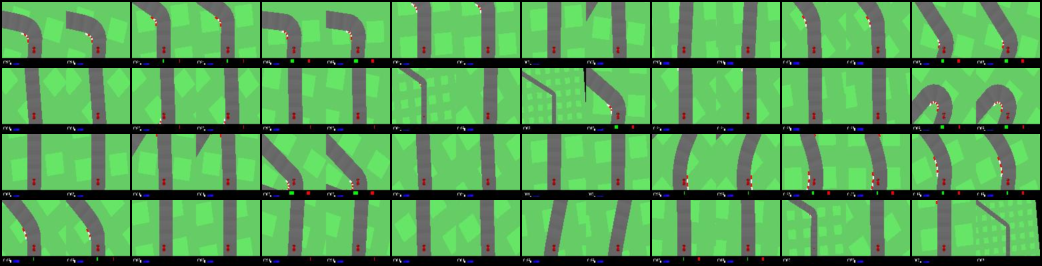

In [31]:
# Fixed input for debugging
fixed_x, _ = next(iter(dataloader))
save_image(fixed_x, 'test_image.png')

from IPython.display import Image
Image(filename='test_image.png')